In [1]:
import pandas as pd
import numpy as np
import sklearn as sk
import sys
from sklearn.model_selection import train_test_split

In [3]:
sys.path.insert(1, 'fuzzy-min-max')
from fuzzy import *

# Setosa

In [36]:
df = pd.read_csv('Dataset/iris-setosa.csv')

df = df.sample(frac=1)

X = df.iloc[:, 1:3].values
y = df.iloc[:,0].values

In [37]:
xTrain, xTest, yTrain, yTest = train_test_split(X,y)
model = FuzzyMMC()

In [38]:
a = np.arange (0.0, 1.1, 0.1)
parameters = {'sensitivity': a, 'exp_bound': a }
parameters['exp_bound']

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [39]:
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(model, parameters, cv = 5)

In [40]:
clf.fit(xTrain, yTrain)

C:\Users\rita folisi\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=<fuzzy.FuzzyMMC object at 0x00000166159540C8>,
             iid='warn', n_jobs=None,
             param_grid={'exp_bound': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
                         'sensitivity': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [41]:
model = clf.best_estimator_

In [42]:
from sklearn.preprocessing import StandardScaler
iris_values_std = StandardScaler().fit_transform(X)

from sklearn.decomposition import PCA
pca_2d = PCA(n_components=2)
iris_values_2d = pca_2d.fit_transform(iris_values_std)

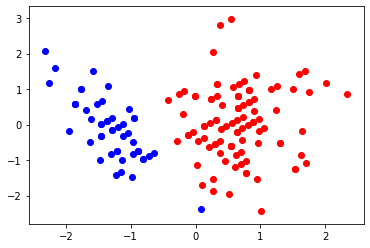

In [43]:
#stampa
%matplotlib inline
import matplotlib.pyplot as plt


def gr_dataset(): 
    for lab, col in zip((1, 0),
                        ('blue', 'red')):
        plt.scatter(iris_values_2d[y==lab, 0],
                    iris_values_2d[y==lab, 1],
                    label=lab,
                    c=col)

gr_dataset()

In [10]:
def gr_membership_contour(estimated_membership):
    x = np.arange(-4, 4, .1)
    y = np.arange(-4, 4, .1)
    X, Y = np.meshgrid(x, y)
    zs = np.array([estimated_membership(np.array(list(zip(np.ravel(x), np.ravel(y)))))
                   for x,y in zip(np.ravel(X), np.ravel(Y))])
    zss = zs[:, :, 1]
    print(np.unique(zss))
    Z = zss.reshape(X.shape)
    membership_contour = plt.contour(X, Y, Z,
                                     levels=(.95, .96, .97, .98, .99), colors='k')
    plt.clabel(membership_contour, inline=1)

[0.95   0.95   0.95   0.9525 0.955  0.955  0.955  0.9575 0.9575 0.9575
 0.96   0.96   0.96   0.9625 0.9625 0.9625 0.965  0.965  0.965  0.9675
 0.9675 0.9675 0.97   0.97   0.97   0.97   0.97   0.9725 0.9725 0.9725
 0.9725 0.9725 0.975  0.975  0.975  0.975  0.9775 0.9775 0.9775 0.98
 0.98   0.98   0.98   0.9825 0.9825 0.9825 0.985  0.985  0.985  0.9875
 0.9875 0.99  ]


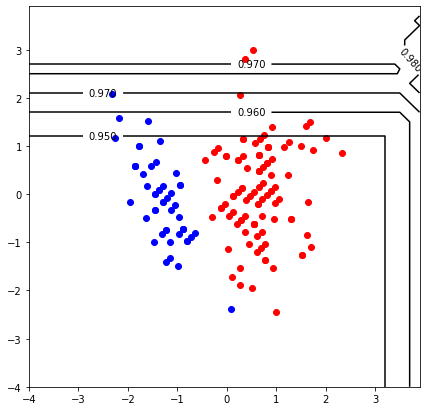

In [145]:
plt.figure(figsize=(7,7))
gr_dataset()
gr_membership_contour(model.estimated_membership)
plt.show()

[0.95       0.95       0.95       0.9525     0.955      0.955
 0.955      0.9575     0.9575     0.9575     0.96       0.96
 0.96       0.9625     0.9625     0.9625     0.965      0.965
 0.965      0.96734375 0.96734375 0.9675     0.9675     0.9675
 0.9675     0.96984375 0.96984375 0.97       0.97       0.97
 0.97234375 0.97234375 0.97234375 0.9725     0.9725     0.9725
 0.9725     0.9725     0.97260742 0.97260742 0.97375    0.974375
 0.97484375 0.97484375 0.97484375 0.975      0.975      0.975
 0.975      0.975      0.97510742 0.97734375 0.97734375 0.9775
 0.9775     0.9775     0.9775     0.97760742 0.97760742 0.97984375
 0.98       0.98       0.98       0.98       0.98010742 0.98234375
 0.98234375 0.9825     0.9825     0.9825     0.9825     0.98260742
 0.98484375 0.98484375 0.985      0.98510742 0.98734375 0.98734375
 0.9875     0.98760742 0.98984375 0.99      ]


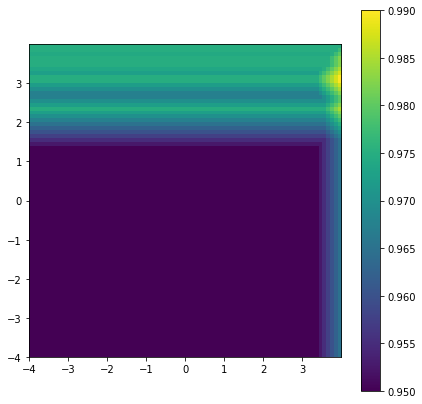

In [44]:
    x = np.arange(-4, 4, .1)
    y = np.arange(-4, 4, .1)
    X, Y = np.meshgrid(x, y)
    zs = np.array([model.estimated_membership(np.array(list(zip(np.ravel(x), np.ravel(y)))))
                   for x,y in zip(np.ravel(X), np.ravel(Y))])
    zss = zs[:, :, 1]
    print(np.unique(zss))
    Z = zss.reshape(X.shape)
    
    plt.figure(figsize=(7,7))
    plt.clf()
    plt.imshow(Z, extent=[-4, 4, -4, 4], origin='lower')
    plt.xticks(np.arange(-4,4,1))
    plt.yticks(np.arange(-4,4,1))
    plt.colorbar()
    plt.savefig("gfmm-set-hm.png")

# Virginica

In [20]:
df = pd.read_csv('Dataset/iris-virginica.csv')

df = df.sample(frac=1)

X = df.iloc[:, 1:3].values
y = df.iloc[:,0].values

In [21]:
xTrain, xTest, yTrain, yTest = train_test_split(X,y)
model = FuzzyMMC()

a = np.arange (0.0, 1.1, 0.1)
parameters = {'sensitivity': a, 'exp_bound': a }
parameters['exp_bound']

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [22]:
clf = GridSearchCV(model, parameters, cv = 5)

In [23]:
clf.fit(xTrain, yTrain)

C:\Users\rita folisi\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=<fuzzy.FuzzyMMC object at 0x00000166131B1048>,
             iid='warn', n_jobs=None,
             param_grid={'exp_bound': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
                         'sensitivity': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [24]:
model = clf.best_estimator_

In [25]:
iris_values_std = StandardScaler().fit_transform(X)

pca_2d = PCA(n_components=2)
iris_values_2d = pca_2d.fit_transform(iris_values_std)

In [30]:
def gr_membership_contour(estimated_membership):
    x = np.arange(-4, 4, .1)
    y = np.arange(-4, 4, .1)
    X, Y = np.meshgrid(x, y)
    zs = np.array([estimated_membership(np.array(list(zip(np.ravel(x), np.ravel(y)))))
                   for x,y in zip(np.ravel(X), np.ravel(Y))])
    zss = zs[:, :, 1]
    print(np.unique(zss))
    Z = zss.reshape(X.shape)
    membership_contour = plt.contour(X, Y, Z,
                                     levels=(.8, .85, .88), colors='k')
    plt.clabel(membership_contour, inline=1)

[0.8  0.8  0.8  0.81 0.82 0.83 0.84 0.85 0.86 0.87 0.88 0.88 0.89 0.89
 0.89 0.89 0.89 0.9  0.9  0.9  0.9 ]


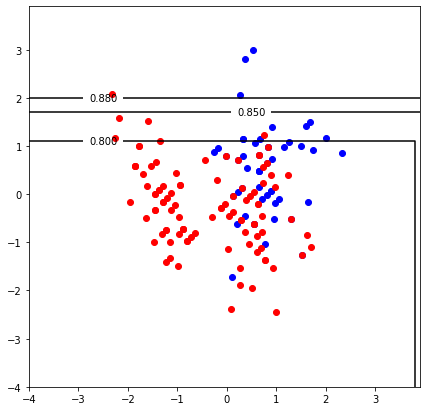

In [31]:
plt.figure(figsize=(7,7))
gr_dataset()
gr_membership_contour(model.estimated_membership)
plt.show()

[0.55       0.56477451 0.58727451 0.60977451 0.63227451 0.65477451
 0.67727451 0.69977451 0.72227451 0.74477451 0.7525     0.7525
 0.76304687 0.76727451 0.775      0.775     ]


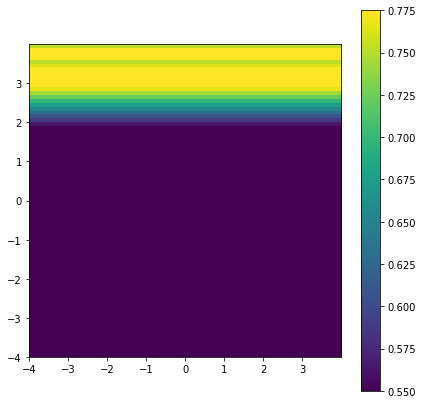

In [26]:
    x = np.arange(-4, 4, .1)
    y = np.arange(-4, 4, .1)
    X, Y = np.meshgrid(x, y)
    zs = np.array([model.estimated_membership(np.array(list(zip(np.ravel(x), np.ravel(y)))))
                   for x,y in zip(np.ravel(X), np.ravel(Y))])
    zss = zs[:, :, 1]
    print(np.unique(zss))
    Z = zss.reshape(X.shape)
    
    plt.figure(figsize=(7,7))
    plt.clf()
    plt.imshow(Z, extent=[-4, 4, -4, 4], origin='lower')
    plt.xticks(np.arange(-4,4,1))
    plt.yticks(np.arange(-4,4,1))
    plt.colorbar()
    plt.savefig("gfmm-virg-hm.png")

# Versicolor 

In [28]:
df = pd.read_csv('Dataset/iris-versicolor.csv')

df = df.sample(frac=1)

X = df.iloc[:, 1:3].values
y = df.iloc[:,0].values

In [29]:
xTrain, xTest, yTrain, yTest = train_test_split(X,y)
model = FuzzyMMC()

a = np.arange (0.0, 1.1, 0.1)
parameters = {'sensitivity': a, 'exp_bound': a }
parameters['exp_bound']

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [30]:
clf = GridSearchCV(model, parameters, cv = 5)

In [31]:
clf.fit(xTrain, yTrain)

C:\Users\rita folisi\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=<fuzzy.FuzzyMMC object at 0x00000166157D1AC8>,
             iid='warn', n_jobs=None,
             param_grid={'exp_bound': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
                         'sensitivity': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [32]:
model = clf.best_estimator_

In [33]:
iris_values_std = StandardScaler().fit_transform(X)

pca_2d = PCA(n_components=2)
iris_values_2d = pca_2d.fit_transform(iris_values_std)

In [60]:
def gr_membership_contour(estimated_membership):
    x = np.arange(-4, 4, .1)
    y = np.arange(-4, 4, .1)
    X, Y = np.meshgrid(x, y)
    zs = np.array([estimated_membership(np.array(list(zip(np.ravel(x), np.ravel(y)))))
                   for x,y in zip(np.ravel(X), np.ravel(Y))])
    zss = zs[:, :, 1]
    print(np.unique(zss))
    Z = zss.reshape(X.shape)
    membership_contour = plt.contour(X, Y, Z,
                                     levels=(.95, .97), colors='k')
    plt.clabel(membership_contour, inline=1)

[0.95       0.95       0.9525     0.95447266 0.955      0.95697266
 0.9575     0.95947266 0.96       0.96197266 0.9625     0.96447266
 0.965      0.96697266 0.9675     0.96947266 0.96984375 0.97
 0.97091675 0.97197266 0.97234375 0.9725     0.97341675 0.97447266
 0.97484375 0.975     ]


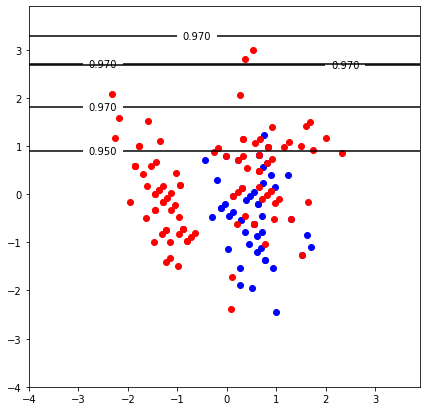

In [61]:
plt.figure(figsize=(7,7))
gr_dataset()
gr_membership_contour(model.estimated_membership)
plt.show()

[0.95       0.95       0.9525     0.95300415 0.955      0.95550415
 0.9575     0.95800415 0.96       0.96050415 0.9625     0.96300415
 0.965      0.96550415 0.9675     0.96800415 0.97       0.97050415
 0.97080078 0.9725     0.9725     0.97300415 0.97330078 0.975
 0.975     ]


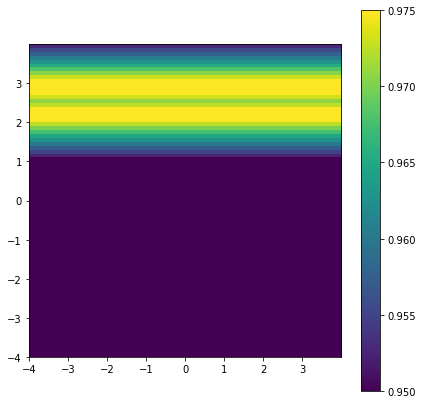

In [35]:
    x = np.arange(-4, 4, .1)
    y = np.arange(-4, 4, .1)
    X, Y = np.meshgrid(x, y)
    zs = np.array([model.estimated_membership(np.array(list(zip(np.ravel(x), np.ravel(y)))))
                   for x,y in zip(np.ravel(X), np.ravel(Y))])
    zss = zs[:, :, 1]
    print(np.unique(zss))
    Z = zss.reshape(X.shape)
    
    plt.figure(figsize=(7,7))
    plt.clf()
    plt.imshow(Z, extent=[-4, 4, -4, 4], origin='lower')
    plt.xticks(np.arange(-4,4,1))
    plt.yticks(np.arange(-4,4,1))
    plt.colorbar()
    plt.savefig("gfmm-vers-hm.png")